# Deep learning from scratch: homework 2

In [ ]:
Name: Weiguang Wang; NetID: wwg7031

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset we [we saw in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_3_logistic_regression.slides.html#/14/1) to test out your code.  This dataset is in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

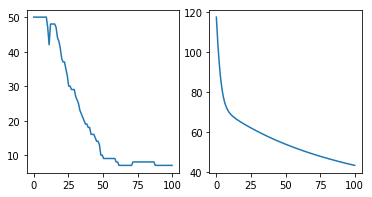

In [8]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# data input
csvname = '3d_classification_data_v2.csv'
data = np.loadtxt(csvname,delimiter = ',')


#softmax cost function
x = data[:, :-1]
y = data[:, -1]
w = np.ones(np.shape(x)[1] + 1)
cost_history = []

def softmax(w):
    
    w_0 = w[0]
    w_vars = w[1:]
    cost = w_0 + np.dot(x, w_vars)
    costArray = np.log(1 + np.exp(-y * cost))
    return np.sum(costArray)
    
# gradient_descent function:
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    weight_history =[]
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            cost_history.append(test_eval)
            best_eval = test_eval
            best_w = w
            weight_history.append(best_w);
            
    return weight_history

weight_history = gradient_descent(softmax, 0.005, 100, w)

def misClass(weight_history):
    num = []
    for p in range(len(weight_history)):
        numVal = 0   
        cur_w = weight_history[p]
        
        w_0 = cur_w[0]
        w_vars = cur_w[1:]
        cost = w_0 + np.dot(x, w_vars)
        for p in range(len(cost)):
            if(y[p] != np.sign(cost[p])):
                 numVal = numVal + 1
        num.append(numVal)
        
    return num

num = misClass(weight_history)

fig, ax = plt.subplots(1, 2, figsize=(6, 3))
xlable = np.linspace(0,len(num), len(num))
ax[0].plot(xlable, num)
ax[1].plot(xlable, cost_history)
plt.show()


#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

**Note:** Python is a great prototyping language but [it is slow](http://jakevdp.github.io/blog/2014/05/09/why-python-is-slow/), particular when evaluating explicit for loops.  If you are having speed issues try re-writing the softmax cost function using as few explicit for-loops as possible (you can indeed write the entire summation in a single line of Python code, for-loop free).

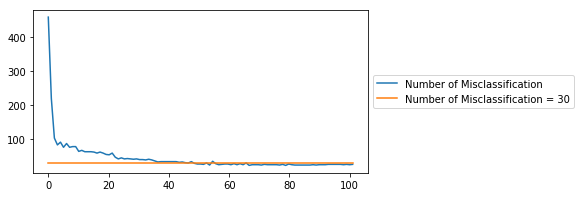

In [9]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# data input
csvname = 'breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')


#softmax cost function
x = data[:, :-1]
y = data[:, -1]
w = np.ones(np.shape(x)[1] + 1)

def softmax(w):
    
    w_0 = w[0]
    w_vars = w[1:]
    cost = w_0 + np.dot(x, w_vars)
    costArray = np.log(1 + np.exp(-y * cost))
    return np.sum(costArray)

# gradient_descent function:
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    weight_history =[]
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
            weight_history.append(best_w);
            
    return weight_history

weight_history = gradient_descent(softmax, 0.0015, 5000, w)

def misClass(weight_history):
    num = []
    for p in range(len(weight_history)):
        numVal = 0   
        cur_w = weight_history[p]
        
        w_0 = cur_w[0]
        w_vars = cur_w[1:]
        cost = w_0 + np.dot(x, w_vars)
        for p in range(len(cost)):
            if(y[p] != np.sign(cost[p])):
                 numVal = numVal + 1
                 
        num.append(numVal)
        
    return num

num = misClass(weight_history)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
xlable = np.linspace(0,len(num), len(num))
fixValue = np.ones(np.shape(xlable)) * 30

ax.plot(xlable, num)
ax.plot(xlable, fixValue)
ax.legend(['Number of Misclassification','Number of Misclassification = 30'],loc='center left',bbox_to_anchor=(1, 0.5))

plt.show()

#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset we saw [in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_5_one_versus_all.slides.html#/) - located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

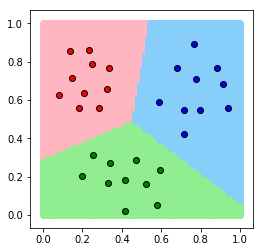

In [3]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import copy
from autograd import grad

# data input
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
w = np.ones(np.shape(data)[1])

#tmp label array        
def get_label(b, target):
    res = [[0 for i in range(len(b[0]))] for i in range(len(b[:, 0]))]
    for i in range(len(b[:,2])):
        res[i] = copy.deepcopy(b[i])
        if (b[i][2] == target):
            res[i][2] = 1
        else:
            res[i][2] = -1
    res = np.asarray(res)
    return res

d_r = get_label(data, 1)
d_b = get_label(data, 2)
d_g = get_label(data, 3)

x = d_r[:, :-1]
y = d_r[:, -1]

def softmax(w):
    
    w_0 = w[0]
    w_vars = w[1:]
    cost = w_0 + np.dot(x, w_vars)
    costArray = np.log(1 + np.exp(-y * cost))
    return np.sum(costArray)

# gradient_descent function:
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
            
    return best_w

# distance calculate
best_wr = gradient_descent(softmax, 0.01, 800, w)
norm_r = np.sqrt(np.sum((best_wr[1:]**2)))
norm_wr = best_wr / norm_r

x = d_b[:, :-1]
y = d_b[:, -1]
best_wb = gradient_descent(softmax, 0.01, 800, w)
norm_b = np.sqrt(np.sum((best_wb[1:]**2)))
norm_wb = best_wb / norm_b

x = d_g[:, :-1]
y = d_g[:, -1]
best_wg = gradient_descent(softmax, 0.01, 800, w)
norm_g = np.sqrt(np.sum((best_wg[1:]**2)))
norm_wg = best_wg / norm_g

#calculate class
def classify(points):
    cur = []
    for i in range(3):
        if (i == 0):
            cur.append(norm_wr[0] + np.dot(norm_wr[1:], points))
        elif (i == 1):
            cur.append(norm_wb[0] + np.dot(norm_wb[1:], points))
        else:
            cur.append(norm_wg[0] + np.dot(norm_wg[1:], points))
    return np.argmax(cur) + 1

# plot

x = np.linspace(0, 1, 80)
y = np.linspace(0, 1, 80)


fig, ax = plt.subplots(1, 1, figsize=(4,4))
for i in x:
    for j in y:
        points = [i, j]
        if (classify(points) == 1):
            ax.scatter(i, j,color = 'lightpink')
        elif (classify(points) == 2):
            ax.scatter(i, j,color = 'lightskyblue')
        else:
            ax.scatter(i, j,color = 'lightgreen')

for i in range(len(data[:,2])):
    if (data[i][2] == 1):
        ax.scatter(data[i][0],data[i][1],color = 'r',edgecolor = 'k')
    if (data[i][2] == 2):
        ax.scatter(data[i][0],data[i][1],color = 'b',edgecolor = 'k')
    if (data[i][2] == 3):
        ax.scatter(data[i][0],data[i][1],color = 'g',edgecolor = 'k')
plt.show()

#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

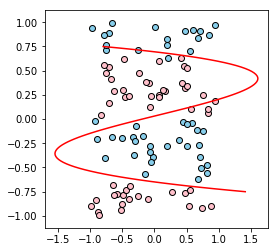

In [3]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# data input
csvname = 'bricks.csv'
data = np.loadtxt(csvname,delimiter = ',')


D = 4
#softmax cost function

x = data[:, :-1]
y = data[:, -1]

for i in range(len(x[:,0])):
    x[i][0], x[i][1] = x[i][1], x[i][0]
    
w = np.random.randn(D+1,1)     # initial point for optimization

# polynomial degree parameter


# prediction function
def predict(pt,w):
    # linear combo
    a = w[0] + sum([w[i]*pt**i for i in range(1,D+1)])
    
    return a

def softmax(w):
    cost = 0
    
    for p in range(len(y)):
        x_p = x[p]
        y_p = y[p]
        
        predict_v = w[0] + sum([w[i]*x_p[0]**i for i in range(1,D+1)])
        cost += np.log(1 + np.exp(-y_p * predict_v))
        
    return cost

# gradient_descent function:
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)

    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # return only the weight providing the lowest evaluation
        test_eval = g(w)
        if test_eval < best_eval:
            best_eval = test_eval
            best_w = w
            
    return best_w


best_w = gradient_descent(softmax, 0.01, 600, w)

#plot
fig, ax = plt.subplots(1, 1, figsize=(4,4))

for i in range(len(x[:,0])):
    x[i][0], x[i][1] = x[i][1], x[i][0]

for i in range(len(data[:,2])):
    if (data[i][2] == 1):
        ax.scatter(data[i][0],data[i][1],color = 'pink',edgecolor = 'k')
    if (data[i][2] == -1):
        ax.scatter(data[i][0],data[i][1],color = 'skyblue',edgecolor = 'k')

x_vals = np.linspace(-0.75,0.75,100)
y_vals = [predict(v,best_w) for v in x_vals]


ax.plot(y_vals,x_vals,color = 'r')
plt.show()